In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split

In [3]:
plt.style.use('ggplot')

# Wczytanie danych

In [ ]:
def _process_name(x: str, add: str) -> str:
    if not isinstance(x, str):
        return "unknown"
    x = x.lower()
    if x == "marszałek":
        return f"marszałek {add}"
    x = x.replace("marszałek", "").replace("poseł", "").replace("sekretarz", "").replace("wice", "").replace("senator", "")
    return x

In [5]:
generate_new_sample = False
if generate_new_sample:
    df_sejm = pd.read_csv('sejm_main_df_all_years.csv')
    df_senat = pd.read_csv('senat_df_all_years.csv')
    with open('sejm_2021-2023.pkl', 'rb') as f:
        df_sejm_ft = pickle.load(f)
    with open('senat_2021-2023.pkl', 'rb') as f:
        df_senat_ft = pickle.load(f)

    df_sejm['place'] = 'sejm'
    df_senat['place'] = 'senat'
    df_sejm_ft['place'] = 'sejm'
    df_senat_ft['place'] = 'senat'
    df_sejm['name'] = df_sejm['name'].apply(lambda x: _process_name(x, "sejmu"))
    df_senat['name'] = df_senat['name'].apply(lambda x: _process_name(x, "senatu"))
    df_sejm_ft['author'] = df_sejm_ft['author'].apply(lambda x: _process_name(x, "sejmu"))
    df_senat_ft['author'] = df_senat_ft['author'].apply(lambda x: _process_name(x, "senatu"))
    df_main = pd.concat([df_sejm, df_senat], ignore_index=True)
    df_main.rename({'name': 'author', 'text': 'texts'}, axis=1, inplace=True)
    df_main['date'] = pd.to_datetime(df_main['date'], errors="coerce")
    df_ft = pd.concat([df_sejm_ft, df_senat_ft], ignore_index=True)
    df_full = pd.concat([df_main, df_ft], ignore_index=True)
    df_full
    # df_main, df_ft = train_test_split(df_full, stratify=df_full['date'], train_size=0.95)
    # df_ft.to_pickle("korpus_wzorcowy.pkl")
    # df_main.to_pickle("korpus_main.pkl")
else:
    df_main = pd.read_pickle("korpus_main.pkl")
    df_ft = pd.read_pickle("korpus_wzorcowy.pkl")

In [22]:
df_main

,date,author,texts,place
4190855,NaT,marszalek,Proszę bardzo — poseł Kledecki.,sejm
5584072,2006-12-20,krzysztof piesiewicz,"Poświęciłem trochę czasu, aby wczytywać się w ...",senat
557880,2017-12-06,ryszard terlecki,Proszę? Chciał pan sprostować swoje pytanie?,sejm
4579419,2012-11-08,bogdan borusewicz,"Informuję, że nikt z państwa senatorów nie zap...",senat
4826058,2011-03-02,bogdan borusewicz,9. Stanowisko Senatu w sprawie ustawy zmieniaj...,senat
...,...,...,...,...
3239747,2004-11-26,marszałek sejmu,Komisja wnosi o odrzucenie tego wniosku.,sejm
1372199,1997-05-21,jerzy jaskiernia,"Chciałbym podziękować uczestnikom dyskusji, kt...",sejm
1495373,1995-05-11,włodzimierz cimoszewicz,Dziękuję panu posłowi.,sejm
4631041,2012-05-24,bogdan borusewicz,Kto przeciw?,senat


In [23]:
df_ft

,date,author,texts,place
2071523,NaT,edward rzepka,Pani Marszałek! Panie i Panowie Posłowie! Kied...,sejm
1520567,2010-03-19,marszałek sejmu,Poprawki 7. i 8. zgłoszono do art. 3 projektu ...,sejm
5776234,2022-06-09,bogdan borusewicz,Pan senator Czerwiński. Proszę bardzo.,senat
1250160,1995-01-19,waldemar dobrowolski,- od rozkazu dziennego dowódcy jednostki zwaln...,sejm
5129525,2000-12-07,głosy z sali,"(Nie działa, Panie Marszałku.)",senat
...,...,...,...,...
1095327,NaT,raczkowski zygmunt,Mimo jednak stałego przyspieszania budownictwa...,sejm
4475279,2019-04-25,leszek czarnobaj,"Panie Ministrze, to jest przedłożenie rządowe....",senat
1158122,1996-09-12,marszałek sejmu,Kto z pań i panów posłów jest za odrzuceniem p...,sejm
2434171,2001-05-23,sprawozdawca jerzy osiatyński,Następne zmiany mają charakter bardziej redakc...,sejm


# Porównanie korpusu pełnego i wzorcowego

In [17]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5491257 entries, 1735104 to 5489767
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   author  object        
 2   texts   object        
 3   place   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 209.5+ MB


In [18]:
df_ft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289014 entries, 5531687 to 2114128
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    275393 non-null  datetime64[ns]
 1   author  289014 non-null  object        
 2   texts   289014 non-null  object        
 3   place   289014 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 11.0+ MB


## Analiza liczby autorów

In [19]:
print(f"Liczba unikalnych autorów w korpusie pełnym: {len(pd.unique(df_main['author']))}, z czego z sejmu: {len(pd.unique(df_main[df_main.place == 'sejm']['author']))} i z senatu: {len(pd.unique(df_main[df_main.place == 'senat']['author']))}")

Liczba unikalnych autorów w korpusie pełnym: 18151, z czego z sejmu: 14086 i z senatu: 5589


In [20]:
print(f"Liczba unikalnych autorów w korpusie wzorcowym: {len(pd.unique(df_ft['author']))}, z czego z sejmu: {len(pd.unique(df_ft[df_ft.place == 'sejm']['author']))} i z senatu: {len(pd.unique(df_ft[df_ft.place == 'senat']['author']))}")

Liczba unikalnych autorów w korpusie wzorcowym: 11667, z czego z sejmu: 9846 i z senatu: 2882


# Rozkład wystąpień per-autor

In [21]:
grouped = df_ft.groupby(['place', 'author']).size().reset_index(name='post_count')

result = grouped.groupby('place')['post_count'].agg(['mean', 'std'])

print(result)

            mean         std
place                       
sejm   21.752387  376.680447
senat  25.968078  158.503435


## Analiza liczby wystąpień w czasie

In [22]:
def plot_in_time(df, ax, x, c):
    df['m'] = df.date.dt.round('D')
    df_fl = df.groupby('m').count()
    sns.scatterplot(df_fl, x='m', y='texts', ax=ax, color=c)
    ax.set_xlabel('Data')
    ax.set_ylabel('Aktywność')
    ax.set_title(f'Rozkład aktywności w czasie dla {x}')

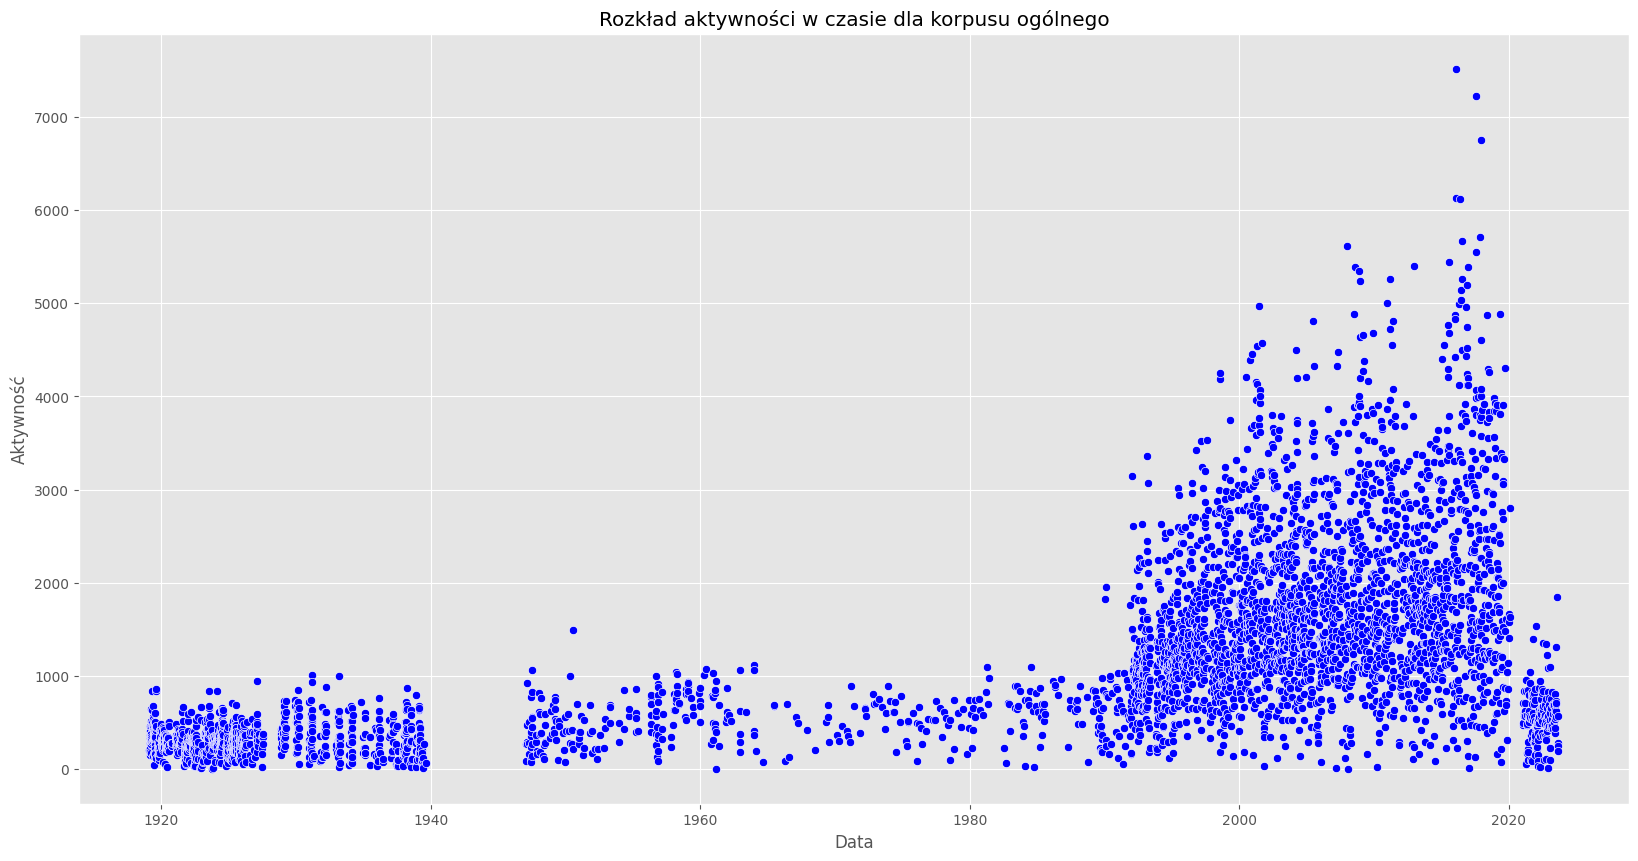

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_in_time(df_main, ax, 'korpusu ogólnego', c='blue')
plt.show()

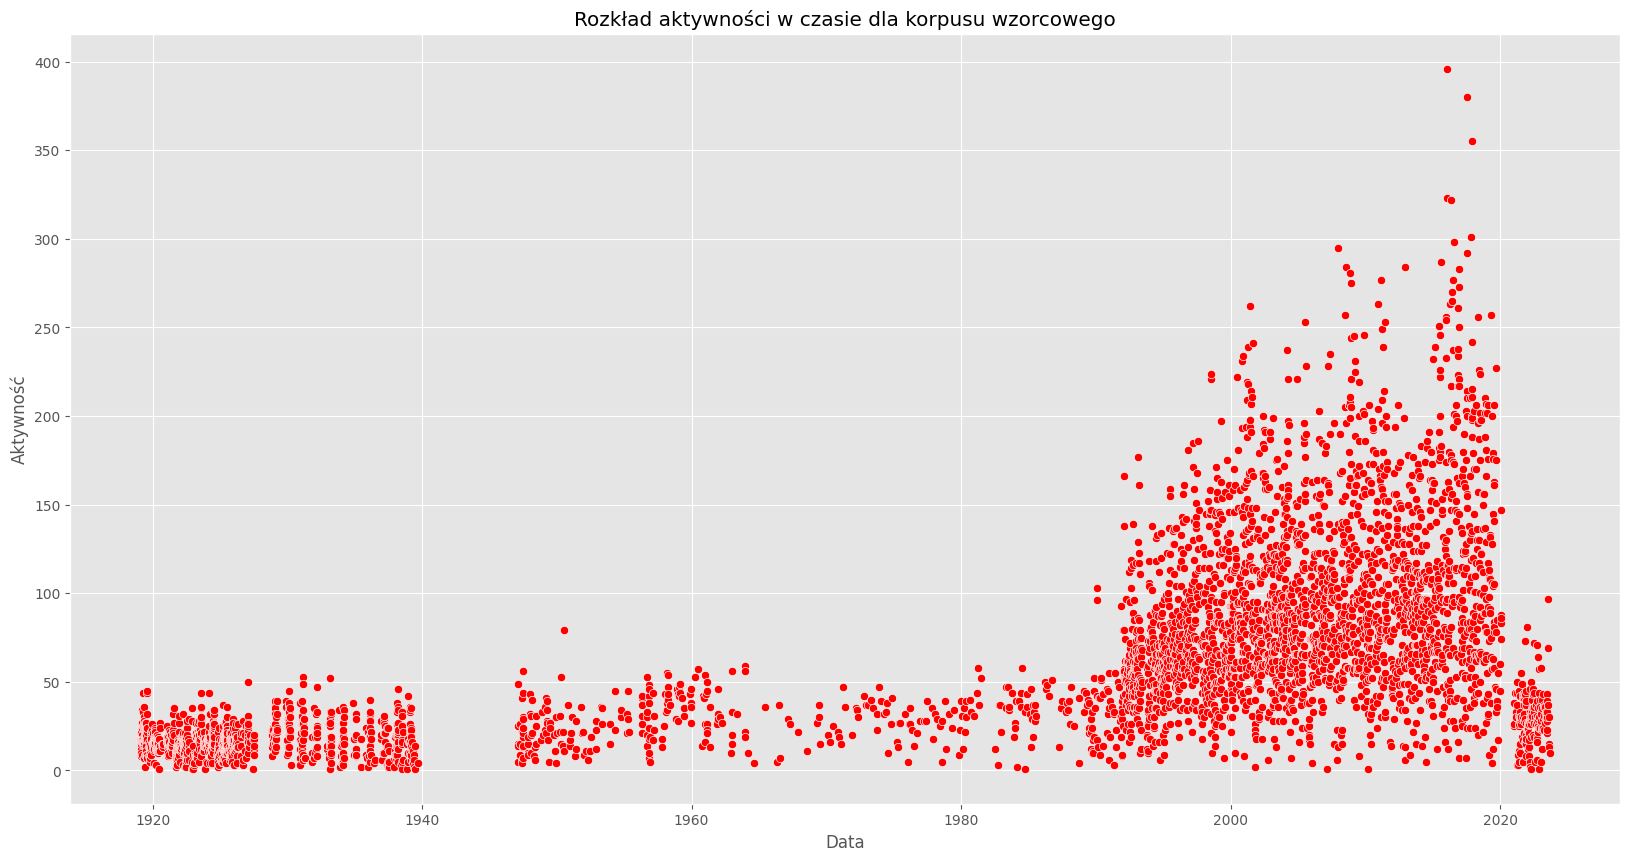

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_in_time(df_ft, ax, 'korpusu wzorcowego', c='red')
plt.show()

# Analiza językowa

Do analizy wykorzystamy jedynie próbkę ze zbioru, aby zaoszczędzić na obliczeniach. Ponieważ nasze samplowanie jest stratyfikowane, a próba duża, wartości oczekiwane powinny być obarczone niewielkimi błędami.

## Samplowanie subsetu korpusu

In [25]:
df_ss, _ = train_test_split(df_main, stratify=df_main['date'].dt.round('D'), train_size=0.01)

In [26]:
df_ss

,date,author,texts,place,m
4418703,2018-04-11,adam bielan,"Proszę sprawozdawcę Komisji Infrastruktury, Ko...",senat,2018-04-11
5440785,2004-04-16,jolanta danielak,"Wobec wyników głosowania stwierdzam, że Senat ...",senat,2004-04-16
3410234,1923-06-14,p. tadeusz prószyński,Do art. 18 proponuję dołączenie pierwszego ust...,sejm,1923-06-14
137776,2016-05-12,małgorzata pępek,Mam więc pytania. Kiedy załatana zostanie luka...,sejm,2016-05-12
5390841,2005-07-15,longin pastusiak,Proszę o naciśnięcie guzika obecności.,senat,2005-07-15
...,...,...,...,...,...
2764860,2003-07-28,stanisław żelichowski,Mieliśmy potężne obawy również co do innych as...,sejm,2003-07-28
2128155,NaT,dobrochna kędzierska-truszczyńska,Panie Marszałku! Wysoka Izbo! Demokratyzacja i...,sejm,NaT
2636738,2000-03-03,stanisław zając,Proszę o zabranie głosu pana posła Stanisława ...,sejm,2000-03-03
4493770,2013-08-07,józef zając,"Panie Ministrze, proszę mi wybaczyć, że… Pan z...",senat,2013-08-07


## Tokenizacja

In [27]:
import spacy
nlp = spacy.load('pl_core_news_sm')

In [28]:
import tqdm
tqdm.tqdm.pandas()

In [29]:
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

In [30]:
df_ss["tokens"] = df_ss["texts"].progress_apply(tokenize_text)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54912/54912 [07:17<00:00, 125.49it/s]


## Liczba słów i tokenów w korpusie

In [31]:
def count_unique_tokens(df):

    tokens = []
    for tok in df["tokens"]:
        tokens.extend(tok)

    unique_tokens = set(tokens)
    num_unique_tokens = len(unique_tokens)
    return num_unique_tokens

In [32]:
print(f'Liczba tokenów w korpusie: {count_unique_tokens(df_ss)} W tym w sejmie: {count_unique_tokens(df_ss[df_ss.place == "sejm"])} i senacie: {count_unique_tokens(df_ss[df_ss.place == "senat"])}')

Liczba tokenów w korpusie: 119211 W tym w sejmie: 105611 i senacie: 51538


In [33]:
df_ss["nt"] = df_ss["tokens"].progress_apply(lambda x: len(x))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54912/54912 [00:00<00:00, 1363867.22it/s]


In [34]:
print(f'Średnia liczba tokenów w korpusie: {df_ss["nt"].mean()} W tym w sejmie: {df_ss[df_ss.place == "sejm"]["nt"].mean()} i senacie: {df_ss[df_ss.place == "senat"]["nt"].mean()}')

Średnia liczba tokenów w korpusie: 48.10008741258741 W tym w sejmie: 49.338208991792236 i senacie: 44.5153578775626


## Rozkład liczby słów na wystąpienie w czasie

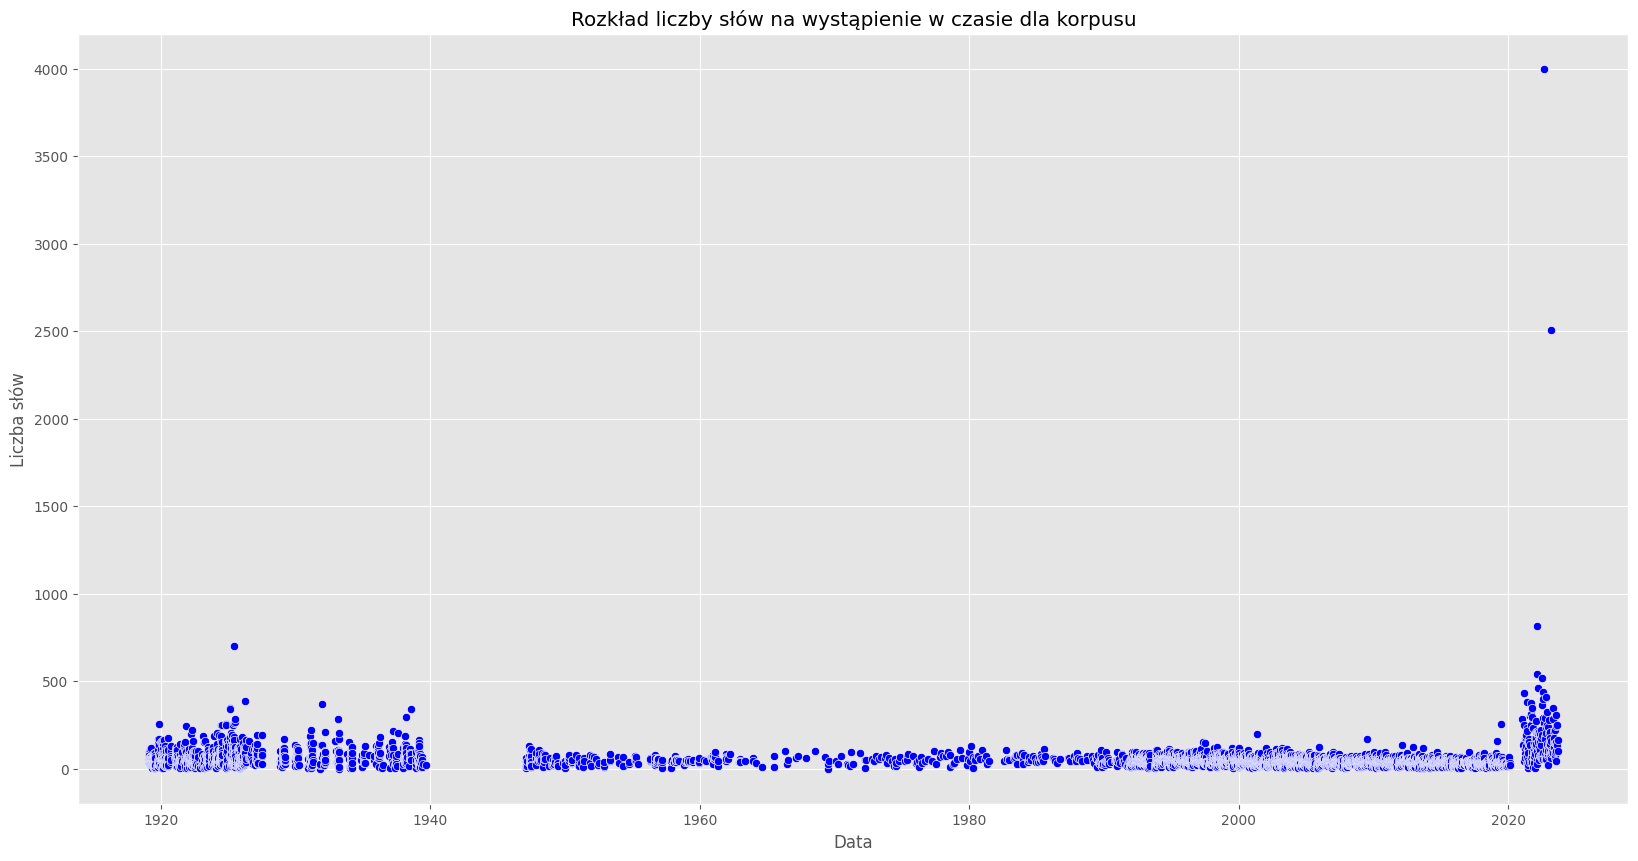

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))
df_ss['m'] = df_ss.date.dt.round('D')
df_fl = df_ss.groupby('m')[["nt", "date"]].mean()
sns.scatterplot(df_fl, x='m', y='nt', ax=ax, color="blue")
ax.set_xlabel('Data')
ax.set_ylabel('Liczba słów')
ax.set_title(f'Rozkład liczby słów na wystąpienie w czasie dla korpusu')
plt.show()

## Liczba wystąpień części zdania

In [36]:
def count_pos(text):
    doc = nlp(text)
    pos_counts = {}
    for token in doc:
        pos = token.pos_
        if pos in pos_counts:
            pos_counts[pos] += 1
        else:
            pos_counts[pos] = 1
    return pos_counts

In [37]:
df_ss["pos_counts"] = df_ss["texts"].progress_apply(count_pos)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54912/54912 [07:10<00:00, 127.61it/s]


In [38]:
pos_df = df_ss['pos_counts'].apply(pd.Series)
df_ss = pd.concat([df_ss, pos_df], axis=1)
df_ss = df_ss.drop('pos_counts', axis=1)

In [39]:
df_ss[df_ss.columns[7:]] = df_ss[df_ss.columns[7:]].fillna(0)

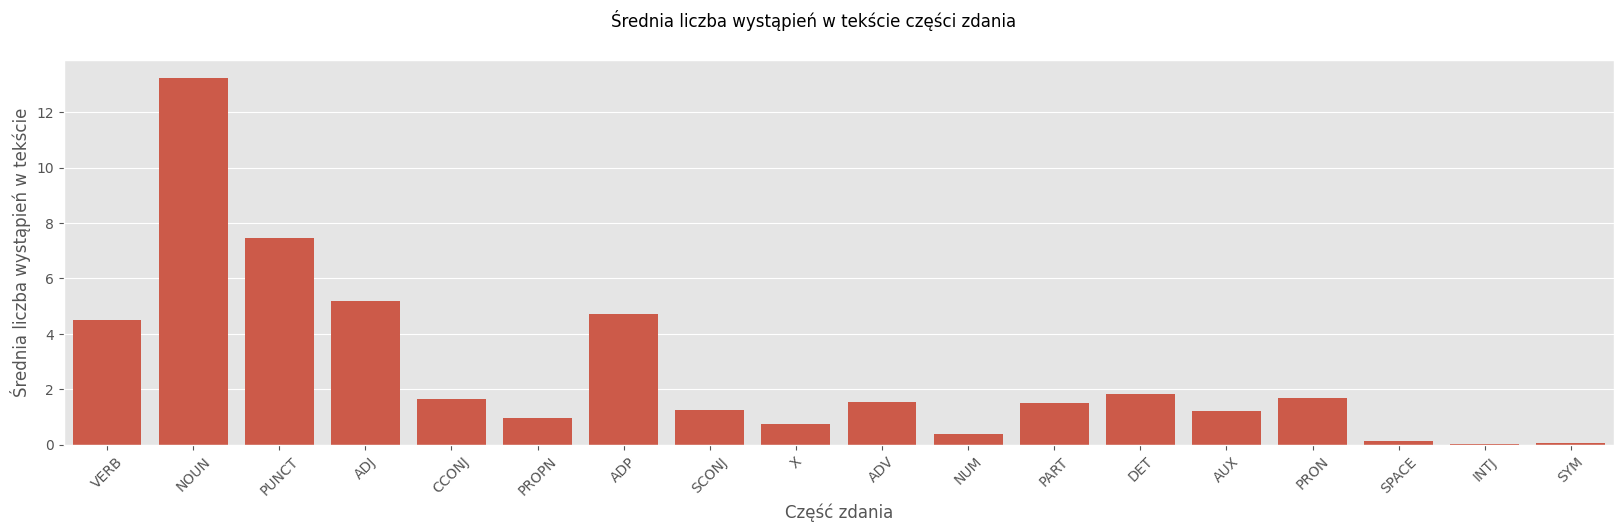

In [40]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(df_ss[df_ss.columns[7:]].mean(), ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax.set_xlabel('Część zdania')
ax.set_ylabel('Średnia liczba wystąpień w tekście')
fig.suptitle('Średnia liczba wystąpień w tekście części zdania')
plt.show()

# Analiza tematyczna

In [41]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from stop_words import get_stop_words

stop_words = get_stop_words('polish') + ['http', 'https', 'amp', 'com']

In [42]:
dictionary = Dictionary(df_ss['tokens'])
corpus = [dictionary.doc2bow(doc) for doc in df_ss['tokens']]

# Build an LDA model
lda_model = LdaModel(corpus, num_topics=6, id2word=dictionary, passes=10)

# Assign topics to documents and add a 'topic' column to the DataFrame
df_ss['topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

In [43]:
df_ss

,date,author,texts,place,m,tokens,nt,VERB,NOUN,PUNCT,...,ADV,NUM,PART,DET,AUX,PRON,SPACE,INTJ,SYM,topic
4418703,2018-04-11,adam bielan,"Proszę sprawozdawcę Komisji Infrastruktury, Ko...",senat,2018-04-11,"[Proszę, sprawozdawcę, Komisji, Infrastruktury...",26,1.0,13.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5440785,2004-04-16,jolanta danielak,"Wobec wyników głosowania stwierdzam, że Senat ...",senat,2004-04-16,"[Wobec, wyników, głosowania, stwierdzam, ,, że...",18,2.0,9.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3410234,1923-06-14,p. tadeusz prószyński,Do art. 18 proponuję dołączenie pierwszego ust...,sejm,1923-06-14,"[Do, art, ., 18, proponuję, dołączenie, pierws...",88,10.0,16.0,14.0,...,4.0,2.0,1.0,4.0,1.0,2.0,0.0,0.0,0.0,4
137776,2016-05-12,małgorzata pępek,Mam więc pytania. Kiedy załatana zostanie luka...,sejm,2016-05-12,"[Mam, więc, pytania, ., Kiedy, załatana, zosta...",94,7.0,28.0,13.0,...,4.0,2.0,5.0,5.0,3.0,1.0,0.0,0.0,0.0,4
5390841,2005-07-15,longin pastusiak,Proszę o naciśnięcie guzika obecności.,senat,2005-07-15,"[Proszę, o, naciśnięcie, guzika, obecności, .]",6,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764860,2003-07-28,stanisław żelichowski,Mieliśmy potężne obawy również co do innych as...,sejm,2003-07-28,"[Mieliśmy, potężne, obawy, również, co, do, in...",255,28.0,49.0,41.0,...,14.0,1.0,11.0,12.0,10.0,14.0,0.0,0.0,0.0,4
2128155,NaT,dobrochna kędzierska-truszczyńska,Panie Marszałku! Wysoka Izbo! Demokratyzacja i...,sejm,NaT,"[Panie, Marszałku, !, Wysoka, Izbo, !, Demokra...",179,20.0,45.0,24.0,...,5.0,3.0,5.0,10.0,4.0,8.0,0.0,0.0,1.0,4
2636738,2000-03-03,stanisław zając,Proszę o zabranie głosu pana posła Stanisława ...,sejm,2000-03-03,"[Proszę, o, zabranie, głosu, pana, posła, Stan...",16,1.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4493770,2013-08-07,józef zając,"Panie Ministrze, proszę mi wybaczyć, że… Pan z...",senat,2013-08-07,"[Panie, Ministrze, ,, proszę, mi, wybaczyć, ,,...",83,10.0,19.0,14.0,...,7.0,2.0,2.0,1.0,1.0,7.0,0.0,0.0,0.0,4


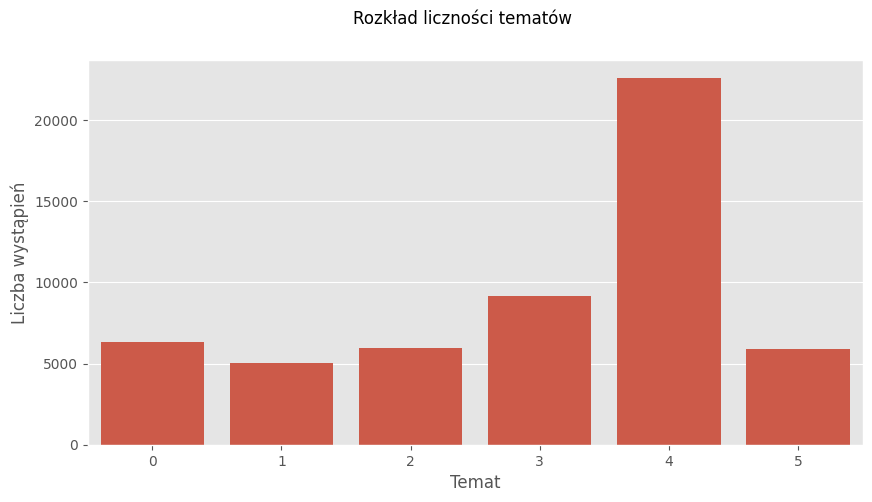

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(df_ss, x='topic', ax=ax)
ax.set_xlabel('Temat')
ax.set_ylabel('Liczba wystąpień')
fig.suptitle('Rozkład liczności tematów')
plt.show()

In [45]:
for t in pd.unique(df_ss.topic):
    df_t = df_ss[df_ss.topic == t]
    print(f'Temat {t}:')

    for tx in df_t.texts[:5]:
        print('\t' + tx)


Temat 2:
	Proszę sprawozdawcę Komisji Infrastruktury, Komisji Gospodarki Narodowej i Innowacyjności oraz Komisji Budżetu i Finansów Publicznych, senatora Grzegorza Peczkisa, o przedstawienie sprawozdania komisji.
	Wobec wyników głosowania stwierdzam, że Senat podjął uchwałę w sprawie ustawy o zmianie ustawy o odpadach.
	Jeżeli zaś chodzi o sprawozdanie Komisji Gospodarki Narodowej, którym dysponowaliśmy, to Komisja Inicjatyw i Prac Ustawodawczych zajęła stanowisko – do którego przedstawienia zostałem upoważniony – względem projektu zawartego w druku nr 328A. Jest ono negatywne względem poprawki pierwszej i drugiej.
	Na tym zakończyliśmy rozpatrywanie punktów porządku dziennego w dniu dzisiejszym.
	Powracamy do rozpatrywania punktu piątego porządku obrad: stanowisko Senatu w sprawie ustawy o zmianie ustawy - Kodeks karny wykonawczy.
Temat 4:
	Do art. 18 proponuję dołączenie pierwszego ustępu z art. 19 i następnie drugiego zdania z 19 art. ust 2, a to dlatego, że art. 18 mówi o radach uc

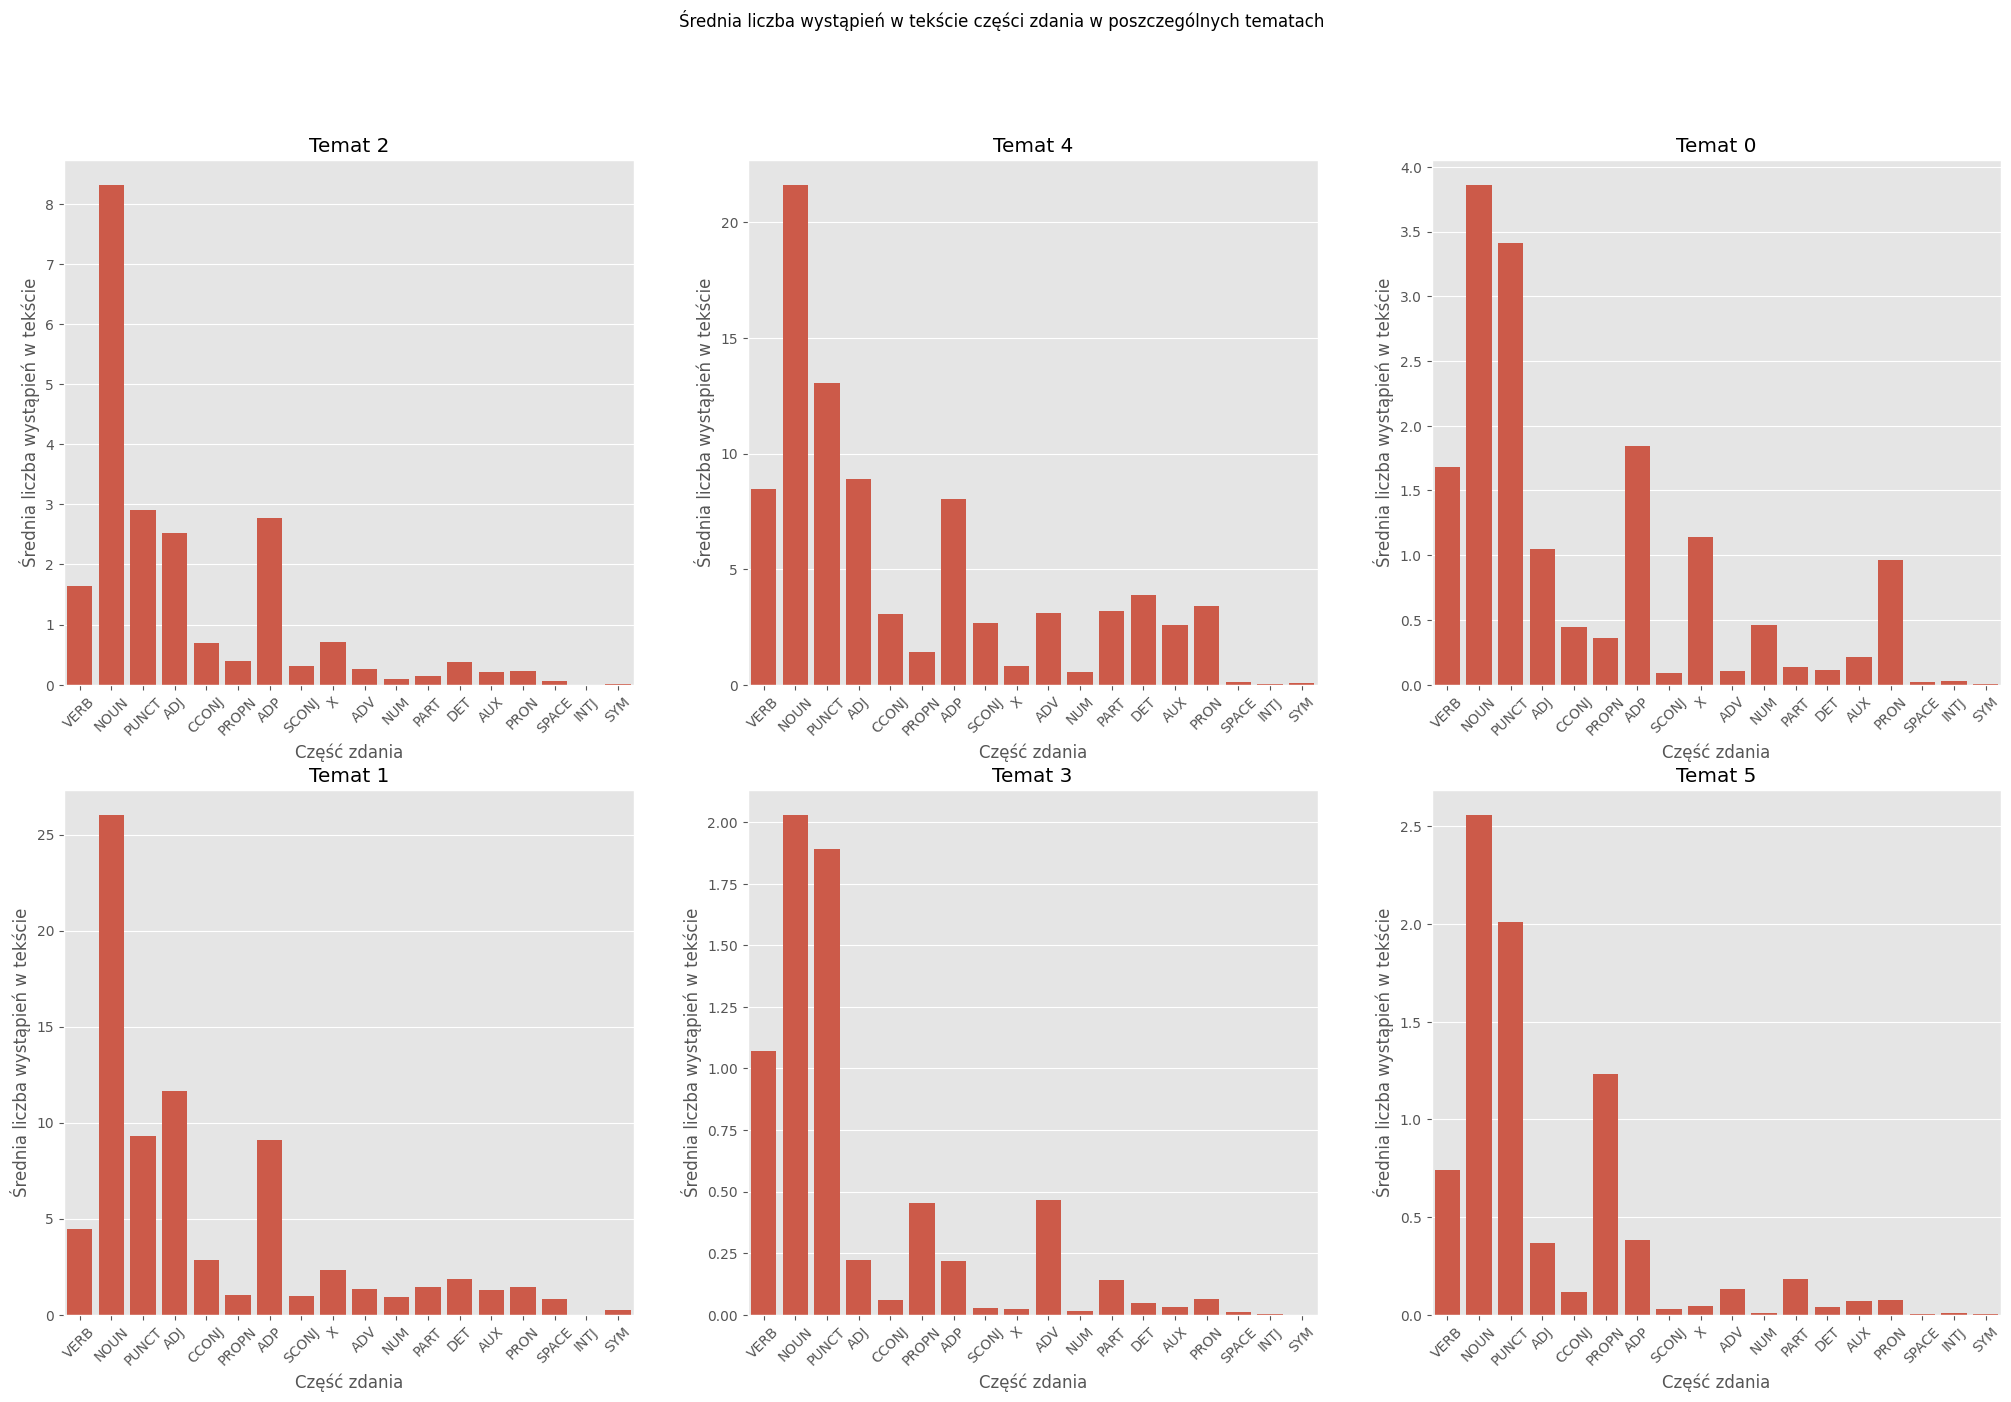

In [46]:
fig, ax = plt.subplots(2, 3, figsize=(25, 15))

topic_iter = iter(pd.unique(df_ss.topic))

for i in range(2):
    for j in range(3):
        t = next(topic_iter)
        df_t = df_ss[df_ss.topic == t]
        sns.barplot(df_t[df_t.columns[7:-1]].mean(), ax=ax[i, j])
        for tick in ax[i, j].get_xticklabels():
            tick.set_rotation(45)
        
        ax[i, j].set_xlabel('Część zdania')
        ax[i, j].set_ylabel('Średnia liczba wystąpień w tekście')
        ax[i, j].set_title(f'Temat {t}')
fig.suptitle('Średnia liczba wystąpień w tekście części zdania w poszczególnych tematach')
plt.show()    

# Analiza sentymentu

In [47]:
from textblob import TextBlob

sentiment_scores = [TextBlob(document).sentiment.polarity for document in df_ss["texts"]]

average_sentiment = sum(sentiment_scores) / len(sentiment_scores)

In [48]:
print(f'Średni sentyment: {average_sentiment}')

Średni sentyment: 0.0013671673193398767
